In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scipy.stats as st
import pingouin as pg

# Import des données clients

In [2]:
# Import du et première vu du fichier client 

datacustomers = pd.read_csv("customers.csv")
datacustomers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


# Vérification des données clients

In [3]:
# Info du fichier client

datacustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# Recherche des valeurs null

print(datacustomers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [5]:
# Vérification des genres

datacustomers['sex'].unique()

array(['f', 'm'], dtype=object)

In [6]:
# Recherche des doublons

datacustomers.loc[datacustomers['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


In [7]:
# Recherche de clients test

client_test = datacustomers[datacustomers['client_id'].str.contains('ct')]
client_test

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


# Nettoyage des données clients

In [8]:
datacustomers = datacustomers.drop(client_test.index)

# Import des données produits

In [9]:
# Import et première vu du fichier produit

dataproducts = pd.read_csv("products.csv")
dataproducts

C:\Users\Ibrahim\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


# Vérification des données produits

In [10]:
# Infos du fichier produit

dataproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
# Recherche des valeurs null

print(dataproducts.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [12]:
# Verification des catégories éxistantes

dataproducts['categ'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
# Vérification du prix maximum

dataproducts['price'].max()

300.0

In [14]:
# Vérification du prix minimum

dataproducts['price'].min()

-1.0

In [15]:
# Recherche de l'erreur de prix minimum

dataproducts[dataproducts['price'] == -1.0]

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
#Recherche des 'id_prod' commencant par la lettre 'T' (les testes)

prod_test = dataproducts[dataproducts['id_prod'].str.contains('T','t')]
prod_test

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
# Recherche des doublons

dataproducts.loc[dataproducts['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


# Nettoyage des données produits

In [18]:
# Suppression des produits test

dataproducts = dataproducts.drop(prod_test.index)

# Import des données de transaction

In [19]:
# Import et première vu du fichier transaction

datatransactions = pd.read_csv("transactions.csv")
datatransactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


# Vérification des données de transaction

In [20]:
# Info du DataFrame

datatransactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [21]:
# Recherche des valeurs null

print(datatransactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [22]:
# Recherche des doublons

datatransactions.loc[datatransactions[['session_id','id_prod','client_id', 'date']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [23]:
# Classement des dates dans l'ordre décroissant

datatransactions.sort_values(by=['date'], ascending=False)

,id_prod,date,session_id,client_id
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


In [24]:
#Recherche des 'date' commencant par 'T'

datatransactions[datatransactions['date'].str.contains('t', 'T')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


# Nettoyage des données transactions

In [25]:
datatransactions = datatransactions.drop(datatransactions[datatransactions['id_prod'] == 'T_0'].index)

In [26]:
datatransactions['date'] = pd.to_datetime(datatransactions['date']).dt.normalize()
datatransactions['date']

0        2022-05-20
1        2022-02-02
2        2022-06-18
3        2021-06-24
4        2023-01-11
            ...    
679527   2022-01-15
679528   2022-03-19
679529   2022-12-20
679530   2021-07-16
679531   2022-09-28
Name: date, Length: 679332, dtype: datetime64[ns]

In [27]:
datatransactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489
679528,1_639,2022-03-19,s_181434,c_4370
679529,0_1425,2022-12-20,s_314704,c_304
679530,0_1994,2021-07-16,s_63204,c_2227



# Merge
---

In [28]:
# Jointure test pour constater les données manquantes

dataV2 = pd.merge(dataproducts, datatransactions, how="outer", on=["id_prod"])
dataV2

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01,s_70071,c_2298
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11,s_163405,c_1098


In [29]:
Val_nul = dataV2[dataV2['price'].isnull()]
Val_nul.nunique()

id_prod         1
price           0
categ           0
date          194
session_id    221
client_id     100
dtype: int64

**On remarque un produit vendu 221 fois mais sans prix ni catégorie !**

- Cependant on constate que l'id_prod est construit a l'aide de la catégorie (le premier chiffre représente la catégorie)


In [30]:
# Recherche du prix moyen des produits de la catégorie 0

mean_price = dataproducts.groupby('categ').mean().reset_index()
mean_price = mean_price[mean_price['categ'] == 0]
mean_price = round(mean_price['price'])
mean_price

0    12.0
Name: price, dtype: float64

In [31]:
# Ajout du produit manquant dans le fichier produit avec les données recolté (catégorie + prix moyen)

dataproducts = dataproducts.append({'id_prod':'0_2245','price':12.0,'categ': 0}, ignore_index=True)

In [32]:
dataproducts[dataproducts['id_prod'] == '0_2245']

,id_prod,price,categ
3286,0_2245,12.0,0


In [33]:
# Vérification des valeurs nulles

dataV2.isnull().sum()

id_prod         0
price         221
categ         221
date           21
session_id     21
client_id      21
dtype: int64

- On constate qu'il y'a 21 produits non vendu !

In [34]:
# Jointure test pour constater les données manquantes

dataV3 = pd.merge(datacustomers, datatransactions, how="outer", on=["client_id"])
dataV3

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29,s_141762
1,c_4410,f,1967,1_385,2021-03-22,s_9707
2,c_4410,f,1967,1_190,2021-11-12,s_118628
3,c_4410,f,1967,0_1455,2021-03-22,s_9942
4,c_4410,f,1967,1_483,2022-03-13,s_178686
...,...,...,...,...,...,...
679348,c_84,f,1982,0_1438,2022-05-29,s_215697
679349,c_84,f,1982,0_1020,2021-10-21,s_107849
679350,c_84,f,1982,0_1399,2021-10-01,s_98493
679351,c_84,f,1982,0_1417,2021-03-13,s_5960


In [35]:
# Recherche des valeurs nulles

dataV3.isnull().sum()

client_id      0
sex            0
birth          0
id_prod       21
date          21
session_id    21
dtype: int64

- On constate qu'il y'a 21 clients inactif !

In [36]:
dataV1 = pd.merge(dataproducts, datatransactions, how="inner", on=["id_prod"])
dataV1

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01,s_70071,c_2298
...,...,...,...,...,...,...
679327,0_2245,12.00,0,2021-08-25,s_80395,c_131
679328,0_2245,12.00,0,2022-03-06,s_175311,c_4167
679329,0_2245,12.00,0,2022-05-16,s_209381,c_4453
679330,0_2245,12.00,0,2022-02-11,s_163405,c_1098


In [37]:
# Reprise du DataFrame avec une jointure interne pour ne pas prendre les clients inactif et les produits non-vendu !

data = pd.merge(dataV1, datacustomers, how="inner", on=["client_id"])
data

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002


## *Calcul et ajout de l'age*

In [38]:
data = data.assign(age = 2023 - data['birth'])
data

,id_prod,price,categ,date,session_id,client_id,sex,birth,age
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,32
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,32
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,32
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,32
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,32
...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2,2022-01-28,s_156517,c_7739,m,1997,26
679328,2_101,63.99,2,2021-07-21,s_65192,c_7089,m,2002,21
679329,2_101,63.99,2,2022-12-21,s_315267,c_7089,m,2002,21
679330,2_101,63.99,2,2022-10-21,s_285788,c_7089,m,2002,21


## *Classement par groupe d'age*

In [39]:
# Création d'une colonne 'Groupe' et ajout du nom du groupe

data['Groupe'] = 'test'

data.loc[data['age'] < 30,['Groupe']] = '- 30 ans'
data.loc[(data['age'] >= 30) & (data['age'] < 50),['Groupe']] = '30-50 ans'
data.loc[(data['age'] >= 50) & (data['age'] < 70),['Groupe']] = '50-70 ans'
data.loc[(data['age'] >= 70),['Groupe']] = '+ 70 ans'

# Mettre les différents groupe dans l'ordre croissants

order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
data = data.reindex(data['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)
data

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe
679331,2_101,63.99,2,2022-03-21,s_182240,c_7089,m,2002,21,- 30 ans
546827,0_1479,15.99,0,2021-12-21,s_137668,c_2831,m,2003,20,- 30 ans
546828,2_102,59.14,2,2023-01-28,s_333573,c_2831,m,2003,20,- 30 ans
546829,2_102,59.14,2,2021-08-28,s_81773,c_2831,m,2003,20,- 30 ans
546830,2_102,59.14,2,2022-09-28,s_274723,c_2831,m,2003,20,- 30 ans
...,...,...,...,...,...,...,...,...,...,...
320101,1_352,19.57,1,2022-03-07,s_175812,c_5366,f,1941,82,+ 70 ans
320100,1_352,19.57,1,2022-02-07,s_161512,c_5366,f,1941,82,+ 70 ans
320099,1_529,17.99,1,2021-11-12,s_118477,c_5366,f,1941,82,+ 70 ans
320107,0_1023,4.99,0,2022-09-03,s_262748,c_5366,f,1941,82,+ 70 ans


In [40]:
# Vérification des groupes d'age

data[data['Groupe'] == 'test']

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe


# <center>**Demandes d'Antoine**
---

## <center>Analyse des tendance du CA

### *Chiffre d'affaire total*

In [41]:
CA = round(data['price'].sum(),2)
print("Chiffre d'affaire total :", CA, "€")

Chiffre d'affaire total : 11856380.68 €


### *Chiffre d'affaire dans le temp*

In [42]:
CAtemp = data.groupby(by=['date']).sum().reset_index()
CAtemp['date'] = pd.to_datetime (CAtemp['date'])
CAtemp = CAtemp.rename(columns={'price':'CA'})
CAtemp['CA'] = round(CAtemp['CA'])
CAtemp = CAtemp[['date','CA']]
CAtemp

,date,CA
0,2021-03-01,16577.0
1,2021-03-02,15498.0
2,2021-03-03,15199.0
3,2021-03-04,15196.0
4,2021-03-05,17471.0
...,...,...
725,2023-02-24,15208.0
726,2023-02-25,15761.0
727,2023-02-26,16305.0
728,2023-02-27,19171.0


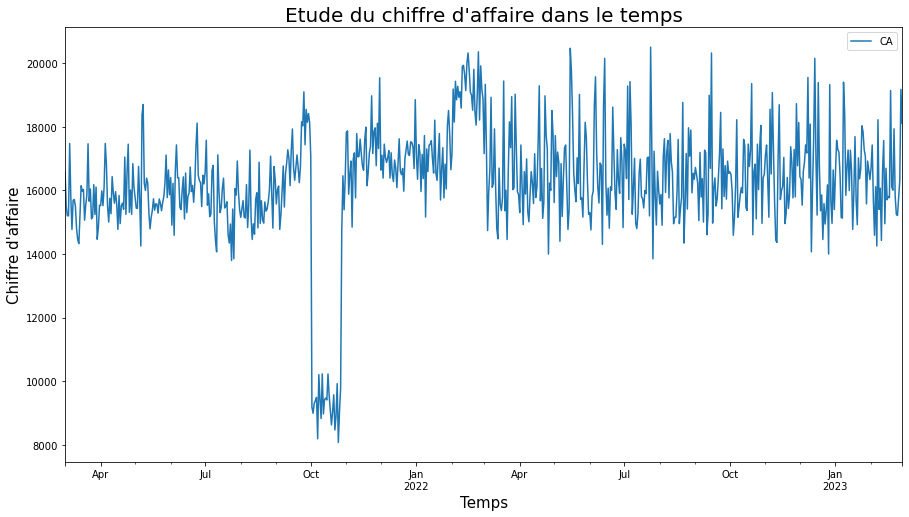

In [43]:
CAtemp.plot.line(y='CA', x = 'date',figsize=(15, 8))
plt.title("Etude du chiffre d'affaire dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

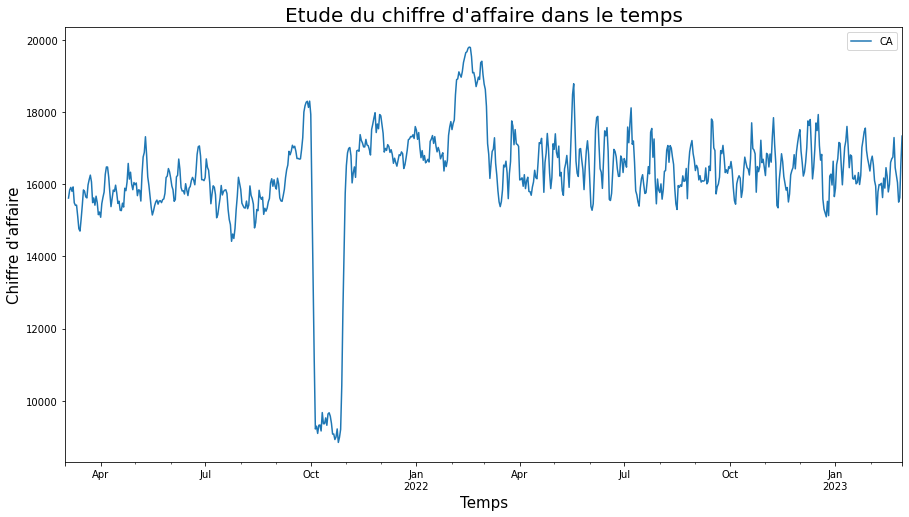

In [44]:
# Décomposition en moyenne mobile

CAmoymobile = CAtemp
CAmoymobile['CA'] = CAmoymobile['CA'].rolling(4).mean()
CAmoymobile.plot.line(y='CA', x = 'date',figsize=(15, 8))
plt.title("Etude du chiffre d'affaire dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

- Légère augmentation mois de septembre de l'année 2021 !
- Grosse baisse du mois d'octobre au mois de novembre de l'année 2021 !
- Légère augmentation mois de février de l'année 2022 !

In [45]:
Oct_2021 = data
Oct_2021['year'] = pd.DatetimeIndex(Oct_2021['date']).year.astype(str)
Oct_2021['month'] = pd.DatetimeIndex(Oct_2021['date']).month.astype(str)
Oct_2021['Mois-Année'] = Oct_2021['month']+'-'+Oct_2021['year']
Oct_2021 = Oct_2021[Oct_2021['Mois-Année'] == '10-2021']
CA_Categ_Oct_2021 = Oct_2021.groupby('categ').sum()
CA_Categ_Oct_2021 = CA_Categ_Oct_2021[['price']].reset_index()
CA_Categ_Oct_2021 = CA_Categ_Oct_2021.rename(columns={'price':'CA'})
CA_Categ_Oct_2021

,categ,CA
0,0,199334.83
1,1,33762.32
2,2,87785.59


- Faible chiffre d'affaire pour la catégorie 1 & 2 au mois d'Octobre 2021

### *Comparaison des chiffre d'affaire par mois sur chaque années*

In [46]:
CAtempV2 = CAtemp
CAtempV2['year'] = pd.DatetimeIndex(CAtempV2['date']).year
CAtempV2['month'] = pd.DatetimeIndex(CAtempV2['date']).month
CAtempV2 = CAtempV2.groupby(by=['year','month']).sum()
CAtempV2 = CAtempV2.unstack('year').reset_index()
CAtempV2

month         CA                      
year             2021       2022       2023
0        1        NaN  526228.50  516425.75
1        2        NaN  532976.25  454327.50
2        3  435891.00  520092.00        NaN
3        4  474648.75  490813.50        NaN
4        5  493190.25  519920.75        NaN
5        6  484073.00  496084.25        NaN
6        7  483387.75  510889.50        NaN
7        8  481817.50  506087.00        NaN
8        9  504379.50  493942.00        NaN
9       10  324109.00  508514.75        NaN
10      11  512560.75  494449.75        NaN
11      12  527019.00  513349.00        NaN

- Il manque les données des 2 premier mois de l'année 2021
- Nous avons seulement les donnée des 2 premiers moi de l'année 2023

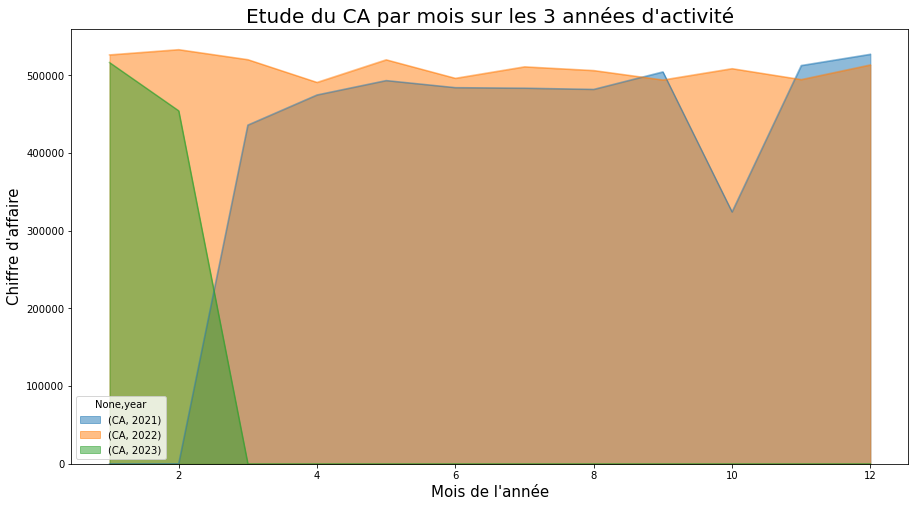

In [47]:
CAtempV2.plot.area(x = 'month',stacked=False ,figsize=(15, 8))
plt.title("Etude du CA par mois sur les 3 années d'activité", size = 20)
plt.xlabel("Mois de l'année", size = 15)
plt.ylabel("Chiffre d'affaire", size = 15)
plt.show()

**2021**
- Données débutant à partir du mois de février
- Grosse baisse du CA au mois d'octobre
- Belle augmentation en général

**2022**
- CA qui augmente et diminue légèrement tout les 2 mois environ
- Stagnation du CA

**2023**
- Données des 2 premiers mois seulement
- Diminution du CA entre le 1er et le 2ème mois

In [48]:
CA_moy_mois = CAtemp
CA_moy_mois['year'] = pd.DatetimeIndex(CA_moy_mois['date']).year
CA_moy_mois['month'] = pd.DatetimeIndex(CA_moy_mois['date']).month
CA_moy_mois = CA_moy_mois.groupby(by=['year','month']).sum().reset_index()
CA_moy_mois = round(CA_moy_mois.groupby(by=['year']).mean().reset_index())
CA_moy_mois

,year,month,CA
0,2021,8.0,472108.0
1,2022,6.0,509446.0
2,2023,2.0,485377.0


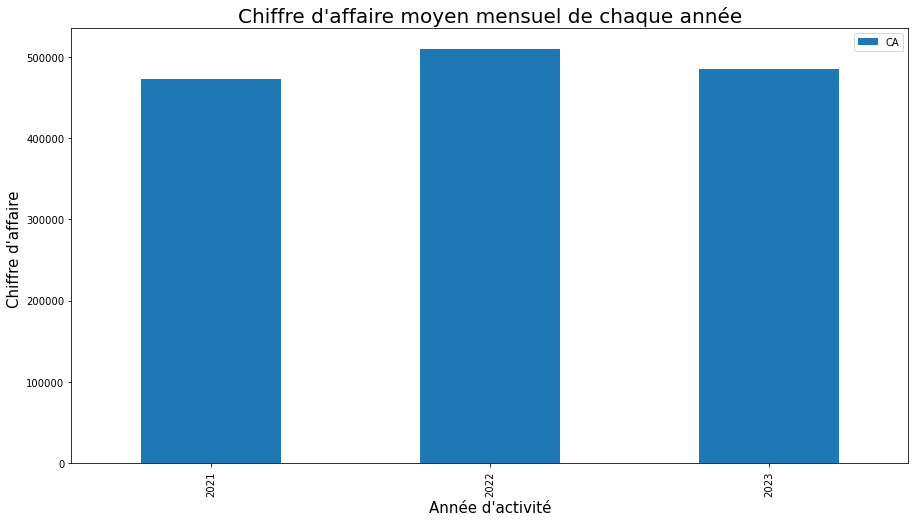

In [49]:
CA_moy_mois.plot.bar(y='CA', x='year', figsize=(15, 8))
plt.title("Chiffre d'affaire moyen mensuel de chaque année", size = 20)
plt.ylabel("Chiffre d'affaire ", size = 15)
plt.xlabel("Année d'activité", size = 15)
#plt.savefig('test')
plt.show()

**Top 1**
- Année 2022 avec un chiffre d'affaire moyen par mois de plus de 500 000€

**Top 2**
- Année 2023 avec un chiffre d'affaire moyen par mois de proche de 500 000€

**Top 3**
- Année 2021 avec un chiffre d'affaire moyen légèrement infèrieur à celui de 2023

### *Chiffre d'affaire par année*

In [50]:
CAyear = data.groupby(pd.Grouper(key='date', freq='Y')).sum().reset_index()
CAyear['date'] = pd.DatetimeIndex(CAyear['date']).year
CAyear = CAyear.rename(columns={'price':'CA'})
CAyear = CAyear[['date','CA']]
CAyear

,date,CA
0,2021,4771870.56
1,2022,6110121.81
2,2023,974388.31


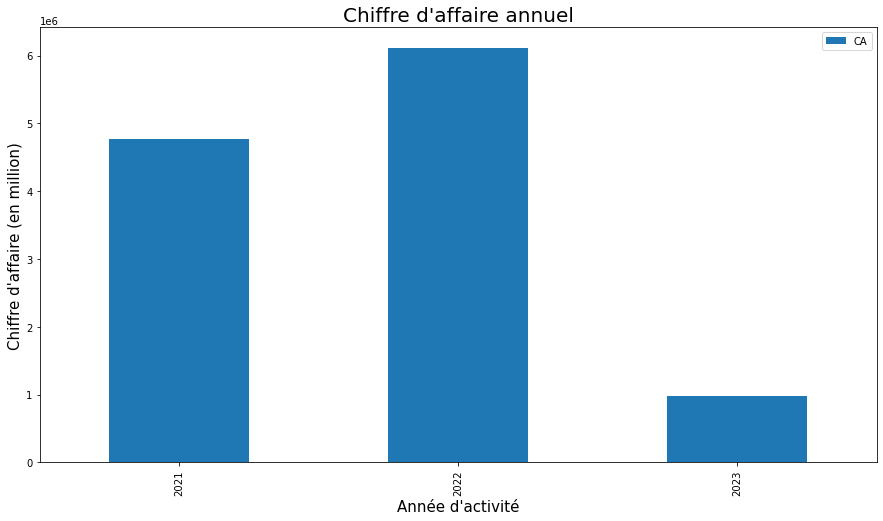

In [51]:
CAyear.plot.bar(y='CA', x='date', figsize=(15, 8))
plt.title("Chiffre d'affaire annuel", size = 20)
plt.ylabel("Chiffre d'affaire (en million)", size = 15)
plt.xlabel("Année d'activité", size = 15)
plt.show()

**2021**
- CA atteignant presque les 5 million d'euro

**2022**
- CA dépassant les 6 million d'euro

**2023**
- CA atteignant presque les 1 million d'euro (seulement les 2 premiers mois)

### *Chiffre d'affaire par catégorie*

In [52]:
CAcateg = data.groupby(by=['categ']).sum()
CAcateg = CAcateg.rename(columns={'price':'CA'})
CAcateg = CAcateg[['CA']]
CAcateg

,CA
categ,
0,4422382.97
1,4653722.69
2,2780275.02


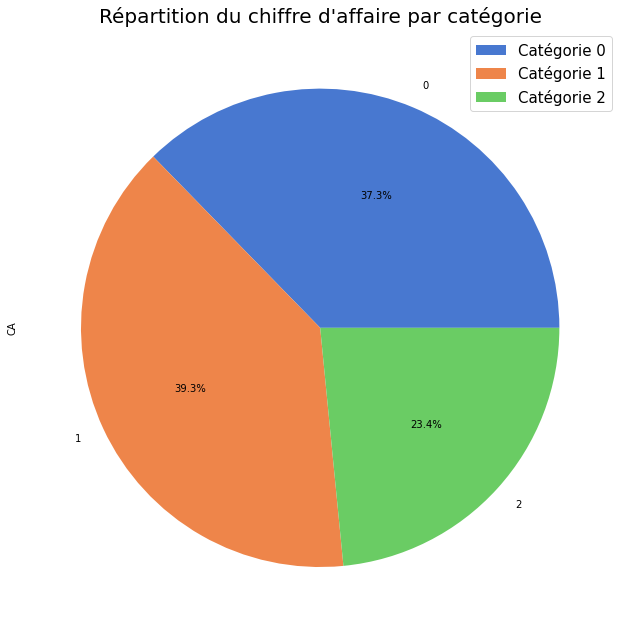

In [53]:
colors = sns.color_palette("muted")
CAcateg.plot.pie(y = 'CA', colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du chiffre d'affaire par catégorie", size = 20)
plt.legend(['Catégorie 0','Catégorie 1','Catégorie 2'], fontsize = 15)
plt.show()

**La catégorie qui effectue le plus gros chiffre d'affaire est la catégorie 1 !**

- La catégorie 0 est très proche de la catégorie 1 : une différence d'environ 2%
- La catégorie 2 est la catégorie qui fait le moin de chiffre d'affaire : néanmoin elle s'approche des 25%

### *Chiffre d'affaire par genre*

In [54]:
CAgenre = data.groupby(by=['sex']).sum()
CAgenre = CAgenre.rename(columns={'price':'CA'})
CAgenre = CAgenre[['CA']]
CAgenre

,CA
sex,
f,5861087.13
m,5995293.55


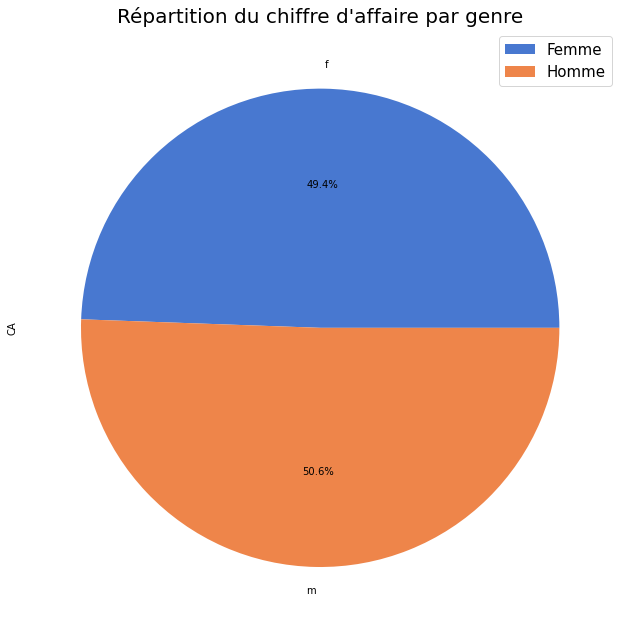

In [55]:
CAgenre.plot.pie(y = 'CA', colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du chiffre d'affaire par genre", size = 20)
plt.legend(['Femme', 'Homme'], fontsize = 15)
plt.show()

**La majorité du chiffre d'affaire est réaliser par les hommes !**

Cependant nous somme trés proche d'une égalité du CA entre homme et femme

### Répartition du chiffre d'affaire

In [56]:
CA_Client = data.groupby('client_id').sum()
CA_Client = CA_Client.rename(columns={'price':'CA'})
CA_Client = CA_Client['CA'].reset_index()
CA_Client.sort_values(by=["CA"], ascending=False)

,client_id,CA
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153670.92
2724,c_3454,113673.93
2513,c_3263,5276.87
...,...,...
4044,c_4648,11.20
1556,c_240,11.06
7889,c_8114,9.98
7918,c_8140,8.30


**On remarque 4 clients avec un chiffre d'affaire générer trés important !**

- On concidère ces clients comme des clients professionnel

Incide de Gini : 0.45


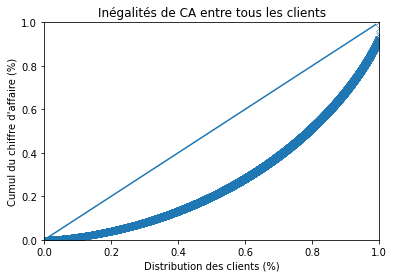

In [57]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', round(gini(X), 2))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.xlabel("Distribution des clients (%)")
    plt.ylabel("Cumul du chiffre d'affaire (%)")
    plt.show()
    
lorenz(CA_Client['CA'], 'Inégalités de CA entre tous les clients')

## <center>Analyse de tendance des produits

### *Chiffre d'affaire par produit*

In [58]:
CAprod = data.groupby(by=['id_prod']).sum().reset_index()
CAprod = CAprod.rename(columns={'price':'CA'})
CAprod = CAprod[['id_prod','CA']]
print("Liste des produits et chiffre d'affaire effectuer :")
CAprod

Liste des produits et chiffre d'affaire effectuer :


,id_prod,CA
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3261,2_95,395.96
3262,2_96,28650.18
3263,2_97,2092.87
3264,2_98,149.74


### *Top 10 des tops produits*

In [59]:
CAprod.sort_values(by=["CA"], ascending=False).head(10)

,id_prod,CA
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
2620,1_395,54356.25
2592,1_369,54025.48
3044,2_110,53846.25
3202,2_39,53060.85
3105,2_166,52449.12


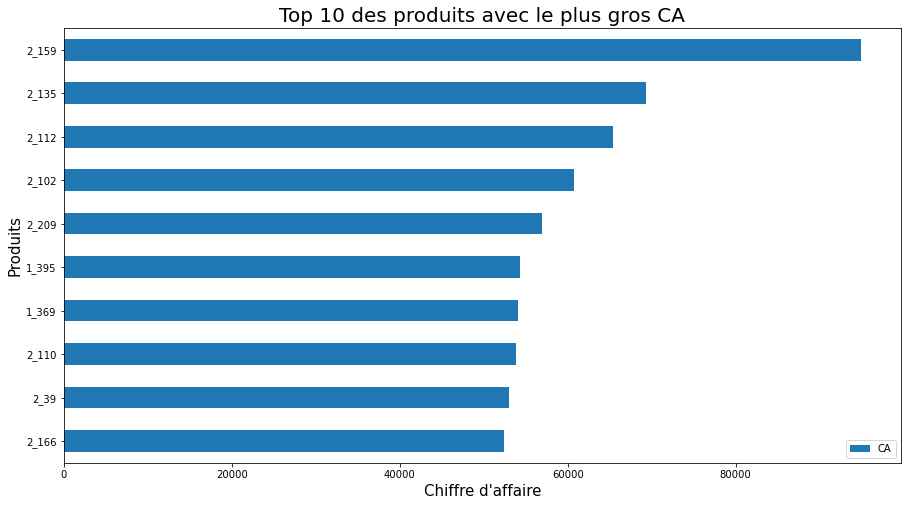

In [60]:
top_10_CAprod = CAprod.sort_values(by=["CA"], ascending=False).head(10)
top_10_CAprod.sort_values(by=["CA"], ascending=True).plot.barh(x = 'id_prod',figsize=(15, 8))
plt.title("Top 10 des produits avec le plus gros CA", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

Le produit 2_159 est un **Best-Seller** qui atteind presque les **100 000€** de chiffre d'affaire !

### *Top 10 des produits les plus vendu*

In [61]:
Nbprod = data.groupby(by=['id_prod']).count().reset_index()
Nbprod = Nbprod.rename(columns={'price':'NbVendu'})
Nbprod = Nbprod[['id_prod','NbVendu']]
Nbprod.sort_values(by=['NbVendu'], ascending=False).head(10)

,id_prod,NbVendu
2592,1_369,2252
2645,1_417,2189
2642,1_414,2180
2734,1_498,2128
2654,1_425,2096
2630,1_403,1960
2640,1_412,1951
2641,1_413,1945
2633,1_406,1939
2634,1_407,1935


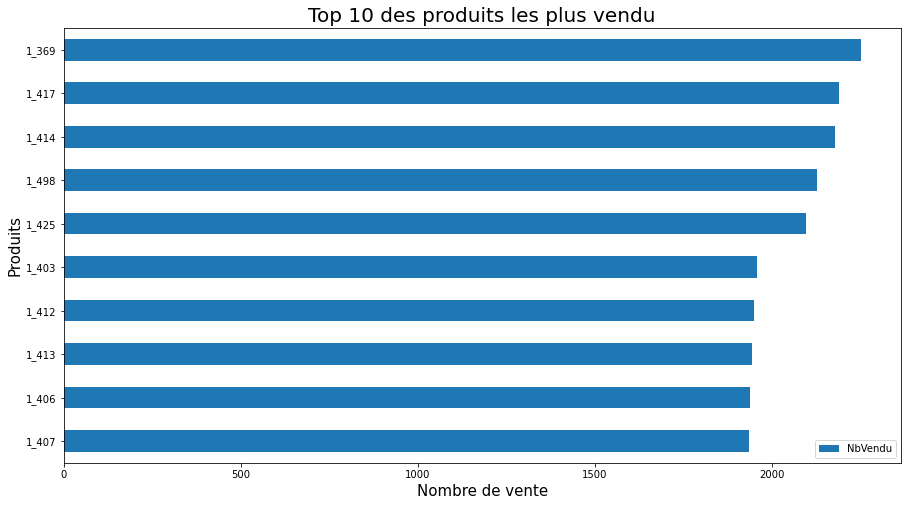

In [62]:
top_10_vente = Nbprod.sort_values(by=['NbVendu'], ascending=False).head(10)
top_10_vente.sort_values(by=["NbVendu"], ascending=True).plot.barh(x = 'id_prod',figsize=(15, 8))
plt.title("Top 10 des produits les plus vendu", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Nombre de vente", size = 15)
plt.show()

### *Top 10 des flop produits*

In [63]:
CAprod.sort_values(by=["CA"], ascending=True).head(10)

,id_prod,CA
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1785,0_541,1.99
2080,0_807,1.99
665,0_1601,1.99
802,0_1728,2.27
549,0_1498,2.48
2180,0_898,2.54
925,0_1840,2.56


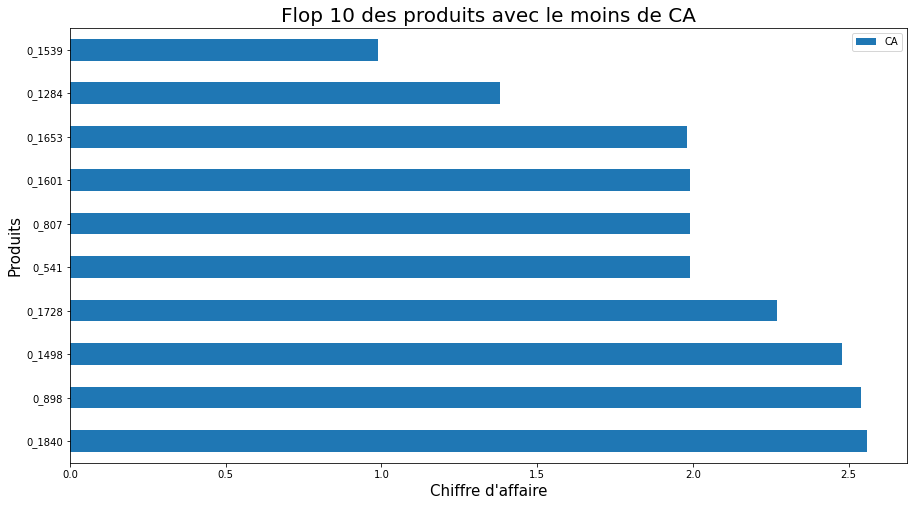

In [64]:
flop_10_CAprod = CAprod.sort_values(by=["CA"], ascending=True).head(10)
flop_10_CAprod.sort_values(by=["CA"], ascending=False).plot.barh(x = 'id_prod',figsize=(15, 8))
plt.title("Flop 10 des produits avec le moins de CA", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

### *Produits les moins vendu*

In [65]:
# Liste des produits avec moins de 10 exemplaires vendu

Nbprod[Nbprod['NbVendu']< 10]

,id_prod,NbVendu
3,0_100,3
9,0_1005,5
10,0_1006,8
17,0_1012,3
22,0_1019,8
...,...,...
3259,2_93,2
3260,2_94,8
3261,2_95,4
3264,2_98,1


**466 produits avec un nombre de vente infèrieur à 10 ventes !**

### *Moyenne de prix des categorie*

In [66]:
MoyPrixCateg = data.groupby(by=['categ']).mean()
MoyPrixCateg = MoyPrixCateg[['price']].reset_index()
round(MoyPrixCateg)

,categ,price
0,0,11.0
1,1,20.0
2,2,76.0


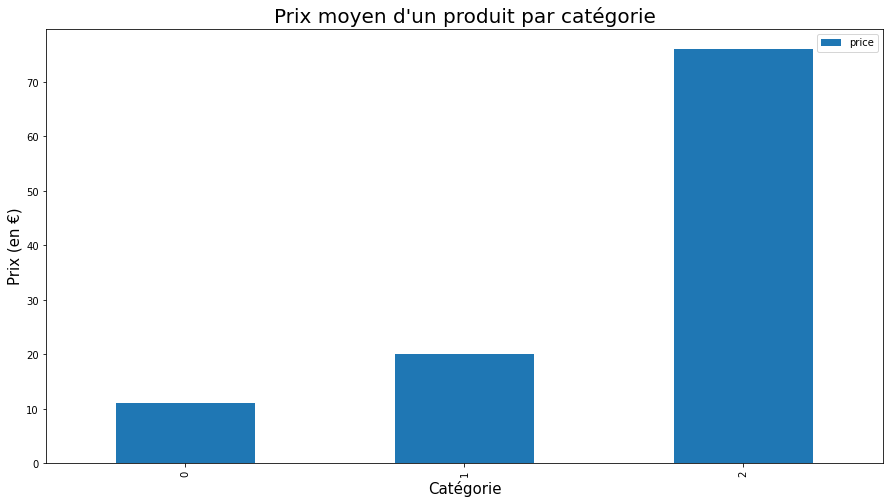

In [67]:
round(MoyPrixCateg).plot.bar(x='categ', y='price', figsize=(15, 8))
plt.title("Prix moyen d'un produit par catégorie", size = 20)
plt.ylabel("Prix (en €)", size = 15)
plt.xlabel("Catégorie", size = 15)
plt.show()

**Prix moyen des produits par catégories :**

- Categ 0 : 11€
- Categ 1 : 20€
- Categ 2 : 76€

### *Quantité de produits et  quantité de produits par catégorie*

In [68]:
# Nombre total de produits différents vendu !

NbProdVendu = data['id_prod'].nunique()
print("Durant la période étudier", NbProdVendu,"produits différent ont été vendu !")

Durant la période étudier 3266 produits différent ont été vendu !


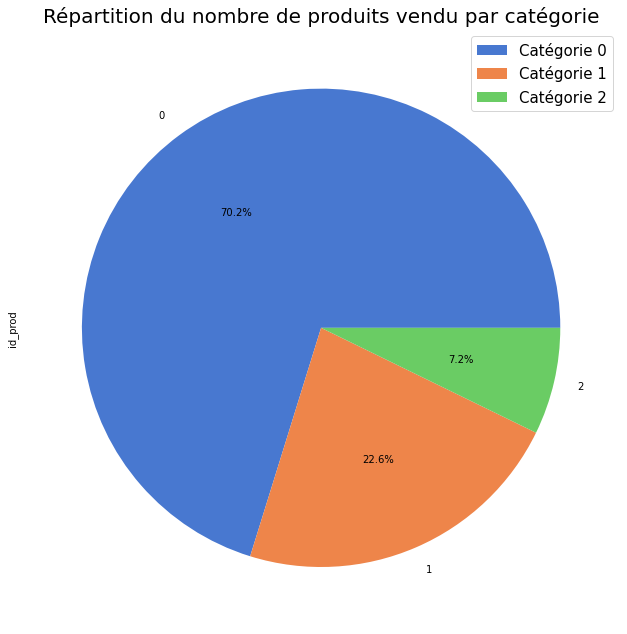

In [69]:
# Répartition des produits par catégorie !

QteProdCateg = data.groupby('categ')['id_prod'].nunique()
QteProdCateg.plot.pie(colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Catégorie 0','Catégorie 1','Catégorie 2'], fontsize = 15)
plt.show()

- La majorité des produits vendu font parti de la catégorie 0, avec plus de 70% des ventes !

- La catégorie 1 est proche des 25%

- Un peu plus de 7% pour la catégorie 2

**En comparant la répartition des vente par catégorie ainsi que le prix moyen par catégorie, on peu constater que moins le prix moyen est élever plus les produits sont vendu !**

## <center>Analyse de tendance profil client

### *Moyenne d'age par catégorie*

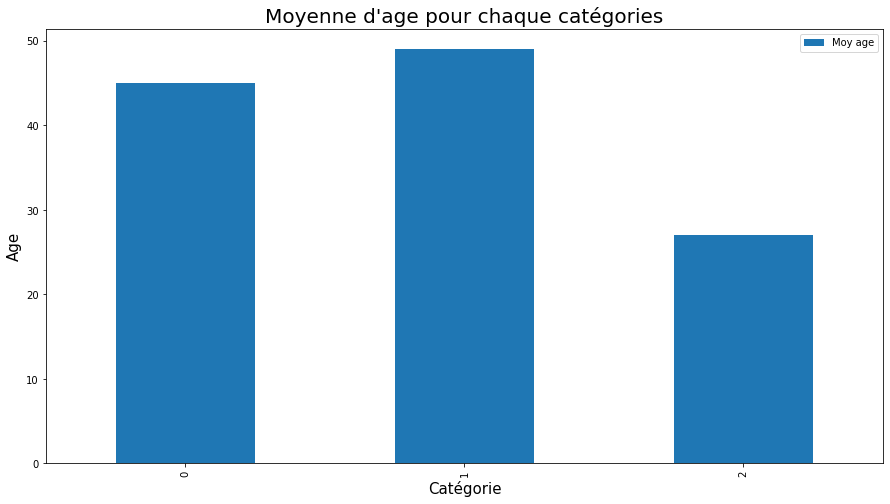

       Moy age
categ         
0         45.0
1         49.0
2         27.0


In [70]:
age_categ = data.groupby(by=['categ']).mean()
age_categ = age_categ.rename(columns={'age':'Moy age'})
age_categ = round(age_categ[['Moy age']])
age_categ.plot.bar(figsize=(15, 8))
plt.title("Moyenne d'age pour chaque catégories", size= 20)
plt.ylabel("Age", size= 15)
plt.xlabel("Catégorie", size= 15)
plt.show()
print(age_categ)

- La catégorie 0 a une moyenne d'age de : 45 ans
- La catégorie 1 a une moyenne d'age de : 49 ans
- La catégorie 2 a une moyenne d'age de : 27 ans

**Ici on remarque que la moyenne d'age de la catégorie 2 est la plus basse, donc on suppose que la catégorie 2 est une catégorie dédier à un public plus jeune !**

### *Chiffre d'affaire par age*

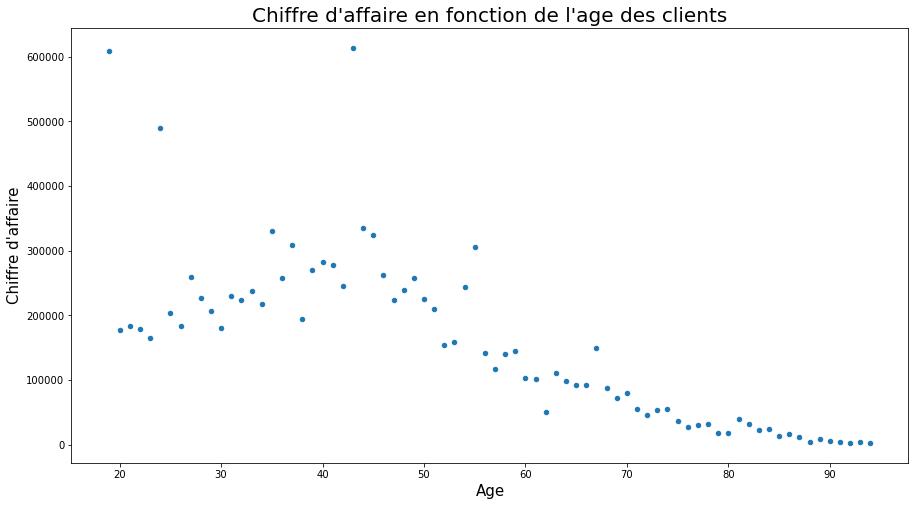

In [71]:
ageCA = data.groupby(by='age').sum()
ageCA = ageCA.rename(columns={'price':'CA'})
ageCA = ageCA[['CA']].reset_index()

ageCA.plot.scatter(y= 'CA',x= 'age', figsize=(15, 8))
plt.title("Chiffre d'affaire en fonction de l'age des clients", size=20)
plt.xlabel("Age", size= 15)
plt.ylabel("Chiffre d'affaire", size= 15)
plt.show()

- Augmentation du CA en fonction de l'age : entre 20 et 45 ans
- Diminution du CA en fonction de l'age : à partir de 45 ans

### *Montant du panier par age*

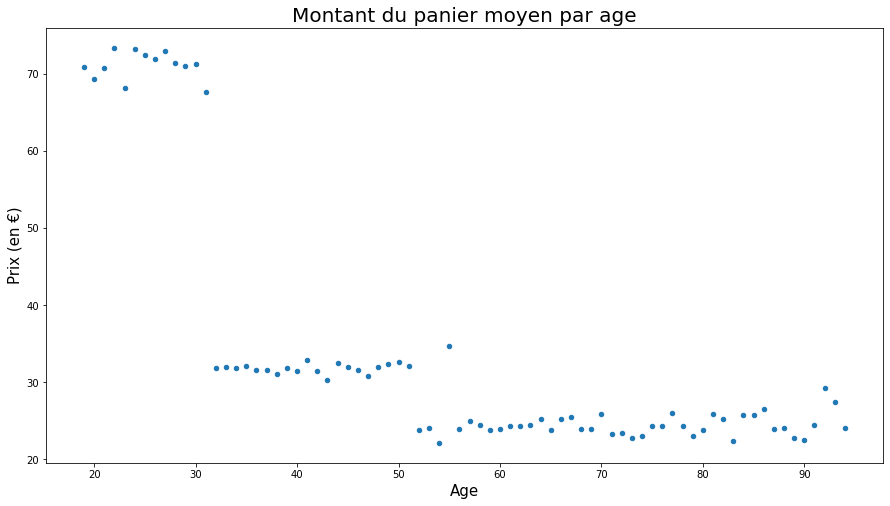

In [72]:
Age_Panier_Moy = data.groupby(['age','session_id']).sum()
Age_Panier_Moy = Age_Panier_Moy.groupby(['age']).mean()
Age_Panier_Moy = Age_Panier_Moy.rename(columns={'price':'Prix (en €)'})
Age_Panier_Moy = Age_Panier_Moy[['Prix (en €)']].reset_index()

Age_Panier_Moy.plot.scatter(y= 'Prix (en €)',x= 'age', figsize=(15, 8))
plt.title("Montant du panier moyen par age", size=20)
plt.xlabel("Age", size= 15)
plt.ylabel("Prix (en €)", size= 15)
plt.show()

**On distingue 3 groupes :**

- Les moins de 30 ans ont les plus gros panier moyen (environ 70€)

- Les 30, 50 ans ont environ un panier moyen de 33€

- Les 50 ans et plus ont environ un panier moyen de 25€

**Le montant le plus élever etant celui des personne ayant moin de 30 ans, nous supposons qu'ils achète majoritairement des produits de la catégorie 2, qui est la plus chère !**

**Et comme nous l'avons remarquer cette catégorie est dédier à un public jeune !**

### *Répartition des clients par groupe d'age*

**Réalisation des groupe d'age en fonction du montant du panier moyen par age**

In [73]:
# Groupe des moins de 30 ans

group1 = data[data['Groupe'] == "- 30 ans"]
group1

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe,year,month,Mois-Année
679331,2_101,63.99,2,2022-03-21,s_182240,c_7089,m,2002,21,- 30 ans,2022,3,3-2022
546827,0_1479,15.99,0,2021-12-21,s_137668,c_2831,m,2003,20,- 30 ans,2021,12,12-2021
546828,2_102,59.14,2,2023-01-28,s_333573,c_2831,m,2003,20,- 30 ans,2023,1,1-2023
546829,2_102,59.14,2,2021-08-28,s_81773,c_2831,m,2003,20,- 30 ans,2021,8,8-2021
546830,2_102,59.14,2,2022-09-28,s_274723,c_2831,m,2003,20,- 30 ans,2022,9,9-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305226,0_1307,18.99,0,2023-02-05,s_337132,c_2836,f,2004,19,- 30 ans,2023,2,2-2023
305223,0_2026,5.56,0,2021-08-31,s_83010,c_2836,f,2004,19,- 30 ans,2021,8,8-2021
305225,0_1307,18.99,0,2022-01-05,s_145192,c_2836,f,2004,19,- 30 ans,2022,1,1-2022
250865,2_32,55.79,2,2022-11-25,s_302640,c_6133,m,2004,19,- 30 ans,2022,11,11-2022


In [74]:
# Groupe des 30-50 ans

group2 = data[data['Groupe'] == "30-50 ans"]
group2

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe,year,month,Mois-Année
401360,0_1591,9.99,0,2021-03-26,s_11680,c_8343,f,1989,34,30-50 ans,2021,3,3-2021
401359,0_1476,15.66,0,2023-01-13,s_326234,c_8343,f,1989,34,30-50 ans,2023,1,1-2023
401373,0_729,28.99,0,2021-03-26,s_11680,c_8343,f,1989,34,30-50 ans,2021,3,3-2021
401375,0_1481,3.99,0,2022-03-02,s_173359,c_8343,f,1989,34,30-50 ans,2022,3,3-2022
401361,0_1734,15.33,0,2021-06-20,s_51499,c_8343,f,1989,34,30-50 ans,2021,6,6-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26892,0_1981,5.99,0,2021-10-23,s_109066,c_1609,m,1980,43,30-50 ans,2021,10,10-2021
26893,1_498,23.37,1,2021-09-11,s_88154,c_1609,m,1980,43,30-50 ans,2021,9,9-2021
26894,1_498,23.37,1,2022-07-18,s_240226,c_1609,m,1980,43,30-50 ans,2022,7,7-2022
99392,0_1175,8.99,0,2022-12-08,s_308909,c_7743,m,1976,47,30-50 ans,2022,12,12-2022


In [75]:
# Groupe des 50-70 ans

group3 = data[data['Groupe'] == "50-70 ans"]
group3

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe,year,month,Mois-Année
83902,0_1089,3.99,0,2021-05-10,s_32532,c_3430,f,1973,50,50-70 ans,2021,5,5-2021
83901,0_461,16.99,0,2022-02-08,s_162035,c_3430,f,1973,50,50-70 ans,2022,2,2-2022
83900,0_461,16.99,0,2022-12-08,s_309051,c_3430,f,1973,50,50-70 ans,2022,12,12-2022
83899,0_461,16.99,0,2023-01-08,s_323937,c_3430,f,1973,50,50-70 ans,2023,1,1-2023
83898,0_1559,9.99,0,2022-08-16,s_254127,c_3430,f,1973,50,50-70 ans,2022,8,8-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431568,1_318,17.24,1,2021-09-02,s_83795,c_344,m,1965,58,50-70 ans,2021,9,9-2021
431567,1_264,16.07,1,2022-03-09,s_176679,c_344,m,1965,58,50-70 ans,2022,3,3-2022
416994,1_280,15.59,1,2022-10-04,s_277690,c_2994,m,1973,50,50-70 ans,2022,10,10-2022
427059,1_285,14.99,1,2021-06-29,s_55279,c_4785,f,1970,53,50-70 ans,2021,6,6-2021


In [76]:
# Groupe des plus de 70 ans

group4 = data[data['Groupe'] == "+ 70 ans"]
group4

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe,year,month,Mois-Année
663371,1_534,13.43,1,2021-07-19,s_64554,c_3890,m,1951,72,+ 70 ans,2021,7,7-2021
663368,0_1438,9.31,0,2021-11-03,s_114319,c_3890,m,1951,72,+ 70 ans,2021,11,11-2021
663369,1_534,13.43,1,2022-09-19,s_270523,c_3890,m,1951,72,+ 70 ans,2022,9,9-2022
663370,1_534,13.43,1,2022-12-19,s_314547,c_3890,m,1951,72,+ 70 ans,2022,12,12-2022
511189,1_160,18.21,1,2021-11-25,s_124756,c_1063,m,1939,84,+ 70 ans,2021,11,11-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320101,1_352,19.57,1,2022-03-07,s_175812,c_5366,f,1941,82,+ 70 ans,2022,3,3-2022
320100,1_352,19.57,1,2022-02-07,s_161512,c_5366,f,1941,82,+ 70 ans,2022,2,2-2022
320099,1_529,17.99,1,2021-11-12,s_118477,c_5366,f,1941,82,+ 70 ans,2021,11,11-2021
320107,0_1023,4.99,0,2022-09-03,s_262748,c_5366,f,1941,82,+ 70 ans,2022,9,9-2022


In [77]:
datagroup = {'Groupe': ['Moins de 30 ans', '30-50 ans', '50-70 ans', 'Plus de 70 ans'],
             'Qte_Client': [group1['client_id'].nunique(), group2['client_id'].nunique(), group3['client_id'].nunique(), group4['client_id'].nunique()],
             'Femme': [group1[group1['sex']=='f']['client_id'].nunique(),group2[group2['sex']=='f']['client_id'].nunique(),group3[group3['sex']=='f']['client_id'].nunique(),group4[group4['sex']=='f']['client_id'].nunique()],
             'Homme': [group1[group1['sex']=='m']['client_id'].nunique(),group2[group2['sex']=='m']['client_id'].nunique(),group3[group3['sex']=='m']['client_id'].nunique(),group4[group4['sex']=='m']['client_id'].nunique()],
             'CA': [round(group1['price'].sum()),round(group2['price'].sum()),round(group3['price'].sum()),round(group4['price'].sum())]
            }

dfgroup = pd.DataFrame(datagroup)
dfgroup = dfgroup.set_index('Groupe')
dfgroup

,Qte_Client,Femme,Homme,CA
Groupe,,,,
Moins de 30 ans,1945,1008,937,2884725
30-50 ans,3396,1752,1644,5513231
50-70 ans,2521,1305,1216,2806583
Plus de 70 ans,738,414,324,651841


In [78]:
data[data['sex'] == "f"].nunique()

id_prod         3178
price           1406
categ              3
date             730
session_id    169457
client_id       4479
sex                1
birth             76
age               76
Groupe             4
year               3
month             12
Mois-Année        24
dtype: int64

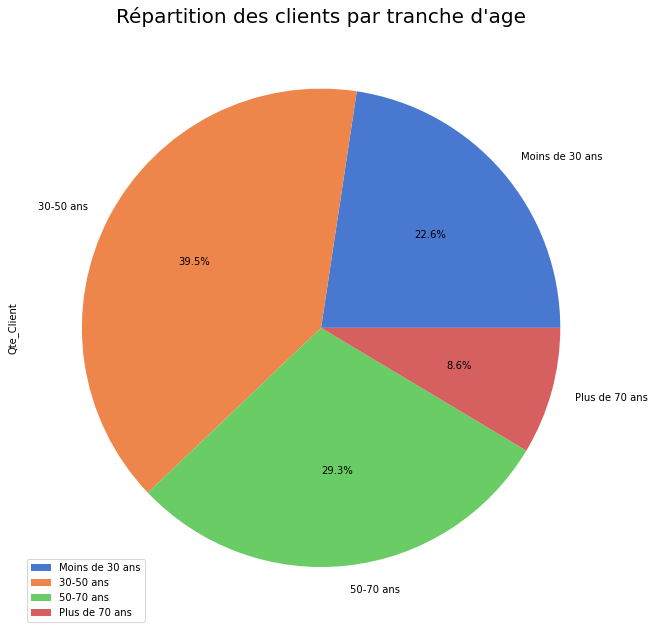

In [79]:
dfgroup.plot.pie(y = 'Qte_Client', colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition des clients par tranche d'age", size=20)
plt.show()

- Le groupe des 30-50 ans est le groupe majoritaire avec presque 40%
- Avec presque 30% nous avons le groupe des 50-70 ans


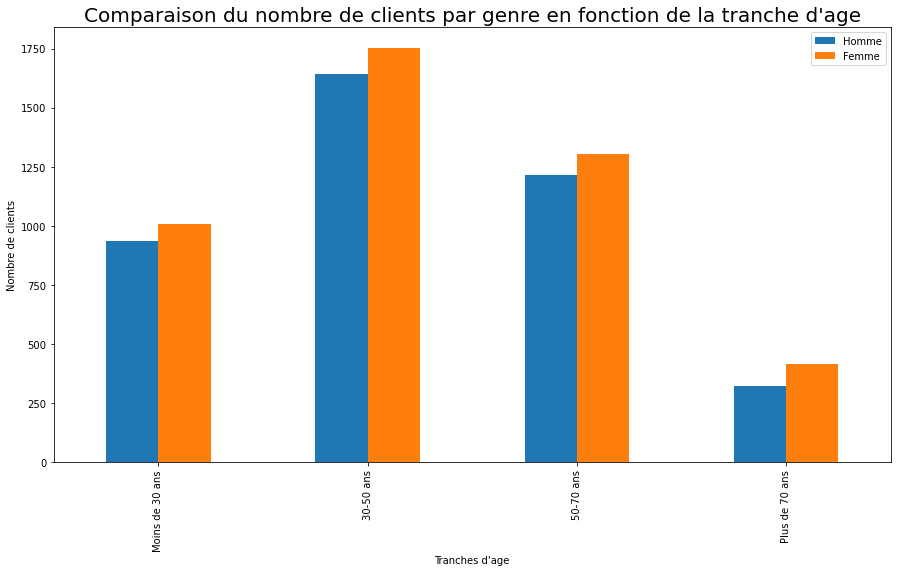

In [80]:
dfgroup[['Homme', 'Femme']].plot.bar( figsize=(15, 8))
plt.title("Comparaison du nombre de clients par genre en fonction de la tranche d'age", size = 20)
plt.ylabel("Nombre de clients")
plt.xlabel("Tranches d'age")
plt.show()

- Dans chaque groupe d'age nous avons plus de femme que d'homme

- Nous avons environ de centaine de femme de plus que d'homme dans chaque groupe

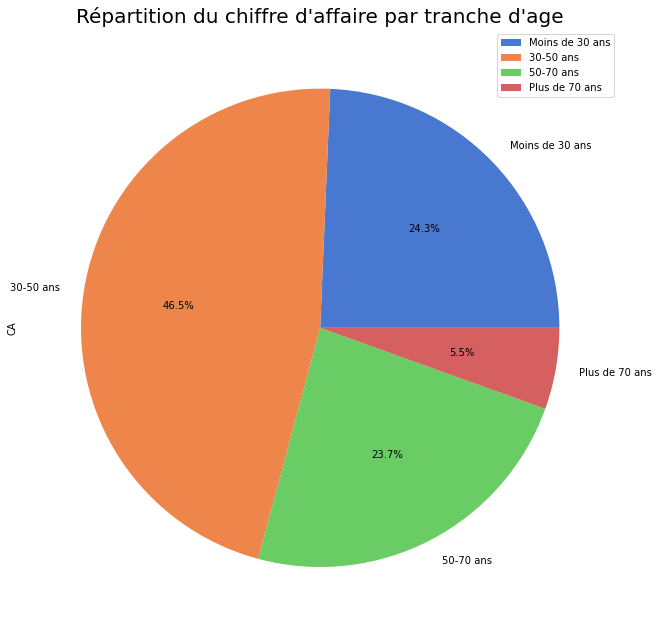

In [81]:
dfgroup.plot.pie(y = 'CA', colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du chiffre d'affaire par tranche d'age", size=20)
plt.show()

# <center>**Demandes de Julie**
---

In [82]:
# Suppression des clients professionnel

client_pro_1 = data[data['client_id'] == 'c_1609']
client_pro_2 = data[data['client_id'] == 'c_4958']
client_pro_3 = data[data['client_id'] == 'c_6714']
client_pro_4 = data[data['client_id'] == 'c_3454']

data = data.drop(client_pro_1.index)
data = data.drop(client_pro_2.index)
data = data.drop(client_pro_3.index)
data = data.drop(client_pro_4.index)

In [83]:
client_pro_4[client_pro_4['Mois-Année'] == '8-2021']

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,Groupe,year,month,Mois-Année
61958,1_287,29.99,1,2021-08-11,s_74339,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
61929,0_0,3.75,0,2021-08-08,s_73013,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
61713,1_670,29.55,1,2021-08-08,s_72969,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
62202,0_1325,9.99,0,2021-08-16,s_76416,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
62232,0_1473,15.99,0,2021-08-01,s_69958,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65290,1_580,21.09,1,2021-08-13,s_74954,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
65289,1_580,21.09,1,2021-08-07,s_72334,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
65327,0_1156,12.79,0,2021-08-14,s_75521,c_3454,m,1969,54,50-70 ans,2021,8,8-2021
65423,0_1584,11.85,0,2021-08-06,s_72178,c_3454,m,1969,54,50-70 ans,2021,8,8-2021


In [84]:
# Part du chiffre d'affaire et chiffre d'affaire des clients professionnel

CA_Pro = client_pro_1['price'].sum() + client_pro_2['price'].sum() + client_pro_3['price'].sum() + client_pro_4['price'].sum()
Part_CA = round((CA_Pro / CA)*100,2)
print("Les 4 clients professionnels on générer",Part_CA,"% du chiffre d'affaire, soit",CA_Pro,"€")

Les 4 clients professionnels on générer 7.43 % du chiffre d'affaire, soit 881138.54 €


**On supprime les clients professionnels pour éviter des résultats faussé !**

In [85]:
# Fonction de vérification de la p-value

def test_p_values(p):
    if p > 0.05:
        print("Variables indépendantes, car p-value > 5% ")
        print("Donc les 2 variables ne sont pas corréler !")
        print("p-value :",p)
    else:
        print("On rejète H0, car p-value < 5%")
        print("Donc les 2 variables sont corréler !")
        print("p-value :",p)

### *Corrélation du genre et de la catégorie*

In [86]:
vente_sex_categ = data.groupby(by=['sex','categ']).count()
vente_sex_categ = vente_sex_categ.rename(columns={'price':'nb_prod'})
vente_sex_categ = vente_sex_categ[['nb_prod']]
vente_sex_categ = vente_sex_categ.unstack('sex')
vente_sex_categ = vente_sex_categ.rename(index={ 0 :'Categ 0', 1 :'Categ 1', 2 :'Categ 2'})
vente_sex_categ

nb_prod        
sex           f       m
categ                  
Categ 0  200904  186589
Categ 1  111331  101017
Categ 2   16980   15868

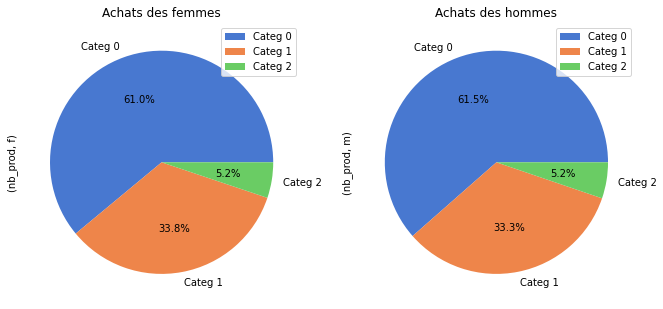

In [87]:
vente_sex_categ.plot.pie(subplots=True, colors = colors, figsize=(11, 11), autopct = "%1.1f%%")

plt.subplot(1,2,1)
plt.title('Achats des femmes')

plt.subplot(1,2,2)
plt.title('Achats des hommes')

plt.show()

In [88]:
# Le lien entre le genre d'un client et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF
# Tableau de contingence

X = "categ"
Y = "sex"

sex_categ = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
sex_categ

sex,f,m,Total
categ,,,
0,200904,186589,387493
1,111331,101017,212348
2,16980,15868,32848
Total,329215,303474,632689


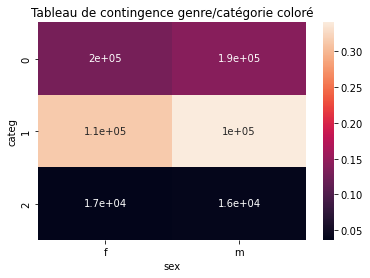

In [89]:
# HeatMap

tx = sex_categ.loc[:,["Total"]]
ty = sex_categ.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = sex_categ.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence genre/catégorie coloré")
plt.show()

In [90]:
# Le lien entre le genre d'un client et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF

Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(sex_categ)
print(Khi2_obs)
test_p_values(p_value)

20.200173796862927
On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.002551063708568263


**Synthèse de la corrélation entre le genre et la catégorie**

Dans un premier temps à la vue du premier graphique nous ne voyeont aucune différence entre le genre masculin et le genre féminin, ce qui nous laisse penser qu'il n'y a aucune corrélation.
<br/>Les répartitions sont casiment identique !
<br/>Mais en regardant le deuxième graphique on s'aperçoit d'une légère différence.<br/>
<br/>Nous sommes face à 2 variables quantitatives !
<br/>Cependant aprés avoir effectuer le test statistique Khi2, nous obtenons une p-value infèrieur à 0,05.
<br/>Ce qui signifie que l'on rejète l'hypothèse nulle, selon laquelle les 2 variables sont indépendante, donc il **existe** bien une corrélation entre ces 2 variables !

### *Corrélation de l'age et du montant total des achats*

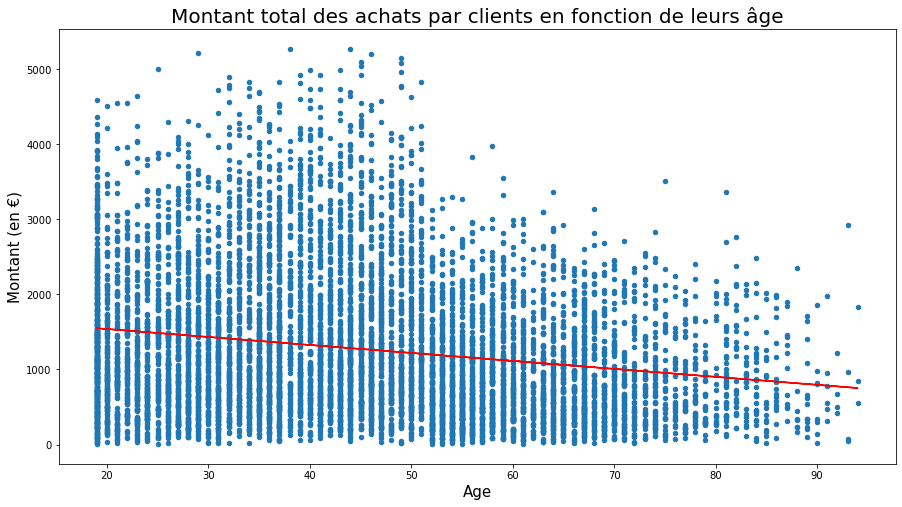

In [91]:
# Montant total des achats par clients

Age_Panier = data.groupby(['client_id', 'age']).sum()
#Age_Panier = data.groupby(['age']).sum()
Age_Panier = Age_Panier.rename(columns={'price':'Montant Total'})
Age_Panier = Age_Panier.reset_index()
Age_Panier = Age_Panier[['age', 'Montant Total']]

slope, intercept, r_value, p_value, std_err = stats.linregress(Age_Panier['age'], Age_Panier['Montant Total'])
def predict(x):
   return slope * x + intercept

Age_Panier.plot.scatter(y= 'Montant Total',x= 'age', figsize=(15, 8))
plt.title("Montant total des achats par clients en fonction de leurs âge", size=20)
plt.ylabel("Montant (en €)", size=15)
plt.xlabel("Age", size=15)
fitLine = predict(Age_Panier['age'])
plt.plot(Age_Panier['age'], fitLine, c='r')
plt.show()


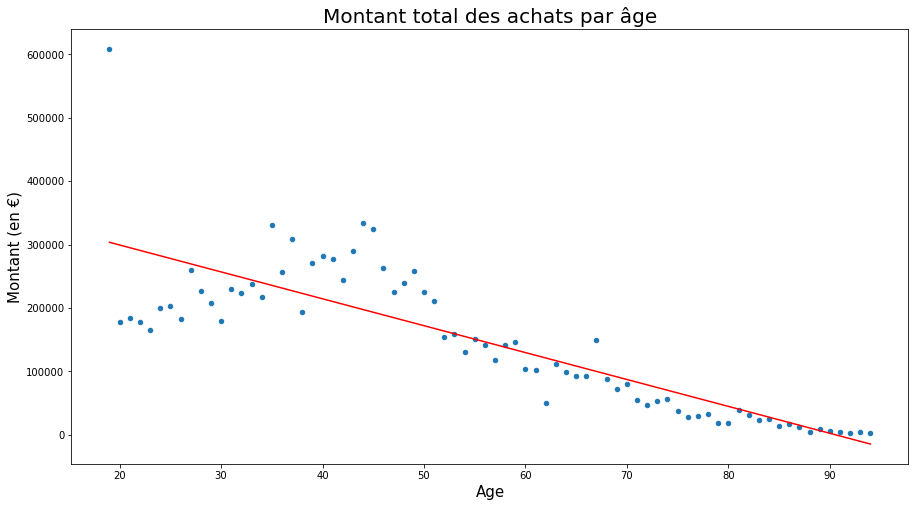

In [92]:
Age_Panier = Age_Panier.groupby(['age']).sum()
Age_Panier = Age_Panier.reset_index()
Age_Panier.plot.scatter(y= 'Montant Total',x= 'age', figsize=(15, 8))

slope, intercept, r_value, p_value, std_err = stats.linregress(Age_Panier['age'], Age_Panier['Montant Total'])
def predict(x):
   return slope * x + intercept

plt.title("Montant total des achats par âge", size=20)
plt.ylabel("Montant (en €)", size=15)
plt.xlabel("Age", size=15)
fitLine = predict(Age_Panier['age'])
plt.plot(Age_Panier['age'], fitLine, c='r')
plt.show()

- Le montant des achats total des personnes agé de 19 ans dépasse les **600 000 €**
- Tendance à l'augmentation entre 20 et 45 ans
- Tendance à la baisse à partir de 45 ans

- L'analyse de régression linéaire a montré une association négative entre les deux variables

In [93]:
# Le lien entre l'âge des clients et le montant total des achats - Analyse QUANTITATIF / QUANTITATIF
# Calcul du coefficient de Pearson

corr, p = pearsonr(Age_Panier['age'], Age_Panier['Montant Total'])
print('Pearsons correlation: %.3f' % corr)
print("Nous voyons ici qu'il y'a une forte corrélation, car le coefficient est proche de -1 !")
test_p_values(p)

Pearsons correlation: -0.831
Nous voyons ici qu'il y'a une forte corrélation, car le coefficient est proche de -1 !
On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 1.699720389396021e-20


**Synthèse de la corrélation entre l'age et le montant total des achats**

Pour commencer, nous remarquons des valeurs extreme que nous écartons par la suite afin d'avoir un résultat le plus réaliste possible.
<br/>En effet le test utiliser est un test paramétrique, donc sensible aux outliers.
<br/>A première vue des graphique nous apercevons une corrélation !<br/>
<br/>Nous sommes face à 2 variables quantitatives !
<br/>Afin de vérifier cette corrélation, nous avons éffectuer un test statistique de Pearson, qui nous donne un coeficient de corrélation ainsi qu'une p-value.
<br/>Nous obtenons un coéfficient de corrélation proche de -1, donc il y a corrélation entre ces 2 variables !
<br/>La p-value obtenue est infèrieur à 0,05 ce qui confirme cette corrélation.

### *Corrélation de la tranche d'age et du montant total des achats*

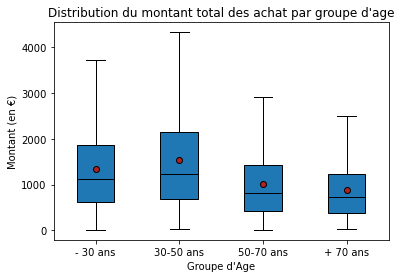

In [94]:
Montant_Total_Client_Groupe = data.groupby(['client_id', 'Groupe']).sum()
Montant_Total_Client_Groupe = Montant_Total_Client_Groupe.rename(columns={'price':'Montant Total'})
Montant_Total_Client_Groupe = Montant_Total_Client_Groupe.reset_index()


# Ordonner les groupes par ordre croissant
order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
Montant_Total_Client_Groupe = Montant_Total_Client_Groupe.reindex(Montant_Total_Client_Groupe['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)

X = "Groupe" # qualitative
Y = "Montant Total" # quantitative
modalites = Montant_Total_Client_Groupe[X].unique()
groupes = []
for m in modalites:
    groupes.append(Montant_Total_Client_Groupe[Montant_Total_Client_Groupe[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution du montant total des achat par groupe d'age")
plt.ylabel("Montant (en €)")
plt.xlabel("Groupe d'Age")
plt.show()

In [95]:
Montant_Total_Client_Groupe

,client_id,Groupe,Montant Total,categ,birth,age
6081,c_6487,- 30 ans,914.71,32,92184,874
1964,c_277,- 30 ans,940.69,32,64000,736
1968,c_2773,- 30 ans,1883.37,52,99850,1300
4540,c_5097,- 30 ans,1003.55,36,90090,945
7769,c_801,- 30 ans,2506.26,70,113886,1425
...,...,...,...,...,...,...
1415,c_2274,+ 70 ans,282.39,7,36936,1501
5022,c_5532,+ 70 ans,2049.41,54,181629,6510
1403,c_2263,+ 70 ans,244.27,6,33150,1241
7411,c_7689,+ 70 ans,231.12,11,27328,994


In [96]:
import scipy.stats as stats

A = Montant_Total_Client_Groupe['Montant Total'][Montant_Total_Client_Groupe['Groupe'] == '- 30 ans']
B = Montant_Total_Client_Groupe['Montant Total'][Montant_Total_Client_Groupe['Groupe'] == '30-50 ans']
C = Montant_Total_Client_Groupe['Montant Total'][Montant_Total_Client_Groupe['Groupe'] == '50-70 ans']
D = Montant_Total_Client_Groupe['Montant Total'][Montant_Total_Client_Groupe['Groupe'] == '+ 70 ans']

#perform Bartlett's test 
stats.bartlett(A, B, C,D)

BartlettResult(statistic=533.6053954907457, pvalue=2.4855493550702586e-115)

In [97]:
# Le lien entre la tranche d'âge des clients et le montant total des achats - Analyse QUALITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='Montant Total', between='Groupe', data=Montant_Total_Client_Groupe)

,Source,ddof1,ddof2,F,p-unc,np2
0,Groupe,3,3118.99099,235.344984,1.201870e-137,0.066139


**Synthèse de la corrélation entre la tranche d'age et le montant total des achats**

On observe une moyenne ainsi qu'une variation asser différente entre les différents groupe d'age, ce qui nous insite à penser qu'il existe une corrélation non-linéaire entre les 2 variables !<br/>
<br/>Nous somme face à une variable quantitative et une variable qualitative !
<br/>Nous avons effectuer le teste statistique Welch's ANOVA, qui nous permet de calculer le rapport de corrélation ainsi que la p-value.
<br/>On obtient un rapport de corrélation proche de 0, mais une p-value infèrieur à 0,05.
<br/>Il existe donc bien une corrélation entre ces 2 variables !

### *Corrélation entre l'age des clients et la fréquence d'achat*

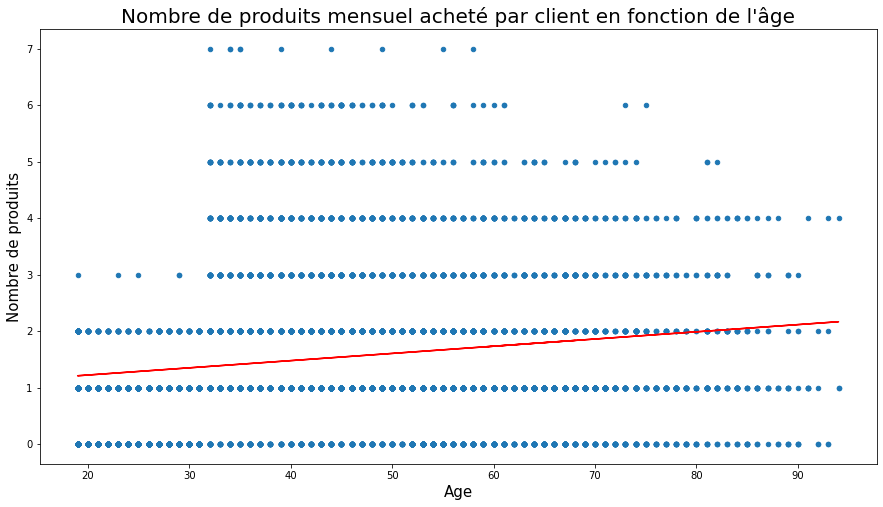

In [98]:
# Méthode n°1
# Calcul du nombre d'achat moyen mensuelle par client pour chaque ages

Freq_Age = data
Freq_Age['year'] = pd.DatetimeIndex(Freq_Age['date']).year.astype(str)
Freq_Age['month'] = pd.DatetimeIndex(Freq_Age['date']).month.astype(str)
Freq_Age['Mois-Année'] = Freq_Age['month']+'-'+Freq_Age['year']
Freq_Age = Freq_Age[['client_id','session_id','id_prod','age', 'Mois-Année']]
Freq_Age = Freq_Age.groupby(['client_id','session_id','Mois-Année','age']).count()
Freq_Age = Freq_Age.groupby(['client_id','age','Mois-Année']).count().reset_index()
Freq_Age = round(Freq_Age.groupby(['client_id','age']).sum()/24).reset_index()

#Freq_Age = round(Freq_Age.groupby('age').mean().reset_index(),2)

slope, intercept, r_value, p_value, std_err = stats.linregress(Freq_Age['age'], Freq_Age['id_prod'])
def predict(x):
   return slope * x + intercept

Freq_Age.plot.scatter(x='age', y='id_prod',figsize=(15, 8))
plt.title("Nombre de produits mensuel acheté par client en fonction de l'âge", size=20)
plt.xlabel("Age", size = 15)
plt.ylabel("Nombre de produits", size = 15)
fitLine = predict(Freq_Age['age'])
plt.plot(Freq_Age['age'], fitLine, c='r')
plt.show()

In [99]:
# Le lien entre l'âge des clients et la fréquence des achats - Analyse QUALITATIF / QUANTITATIF
# Test de Pearson

# H0 = Les 2 variables ne sont pas corréler !
# H1 = Les 2 variable sont corréler 

corr, p = pearsonr(Freq_Age['age'], Freq_Age['id_prod'])
print('Pearsons correlation: %.3f' % corr)
test_p_values(p)

Pearsons correlation: 0.160
On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 1.5514666149302257e-50


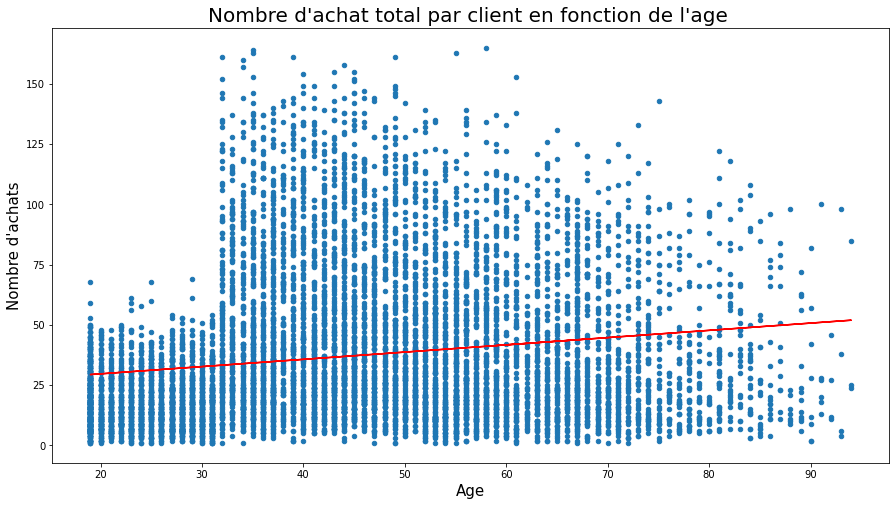

In [100]:
# Méthode n°2
# Calcul du nombre de produit acheter par client sur la pèriode étudier en fonction de l'age

Freq_Achat_Age = data.groupby(['client_id','age']).nunique()
Freq_Achat_Age = Freq_Achat_Age[['session_id']].reset_index()
Freq_Achat_Age = Freq_Achat_Age.rename(columns={'session_id':'Nb_Achat'})

slope, intercept, r_value, p_value, std_err = stats.linregress(Freq_Achat_Age['age'], Freq_Achat_Age['Nb_Achat'])
def predict(x):
   return slope * x + intercept

Freq_Achat_Age.plot.scatter(x='age', y='Nb_Achat',figsize=(15, 8))
plt.title("Nombre d'achat total par client en fonction de l'age ", size=20)
plt.xlabel("Age", size = 15)
plt.ylabel("Nombre d'achats", size = 15)
fitLine = predict(Freq_Achat_Age['age'])
plt.plot(Freq_Achat_Age['age'], fitLine, c='r')
plt.show()

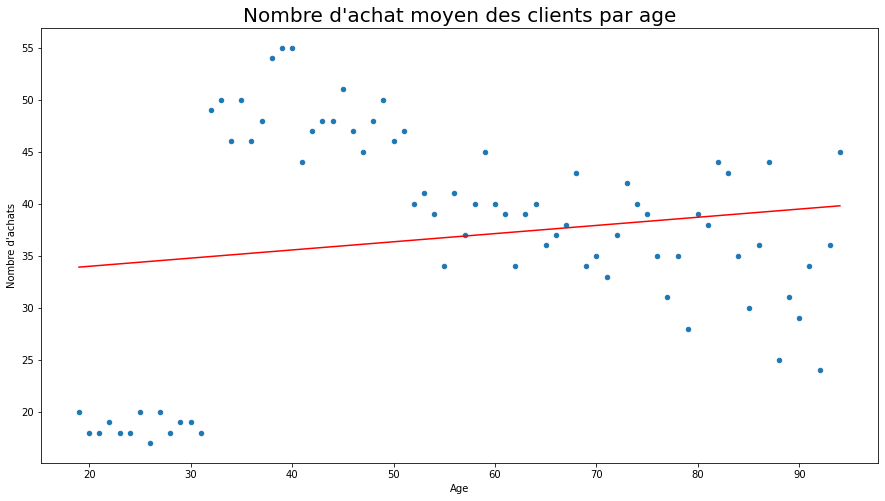

In [101]:
Freq_Achat_Moy_Age = round(Freq_Achat_Age.groupby('age').mean().reset_index())

slope, intercept, r_value, p_value, std_err = stats.linregress(Freq_Achat_Moy_Age['age'], Freq_Achat_Moy_Age['Nb_Achat'])
def predict(x):
   return slope * x + intercept

Freq_Achat_Moy_Age.plot.scatter(x='age', y='Nb_Achat',figsize=(15, 8))
plt.title("Nombre d'achat moyen des clients par age", size=20)
plt.xlabel("Age")
plt.ylabel("Nombre d'achats") 
fitLine = predict(Freq_Achat_Moy_Age['age'])
plt.plot(Freq_Achat_Moy_Age['age'], fitLine, c='r')
plt.show()

- L'analyse de régression linéaire montre une association positive entre les deux variables

In [102]:
# Le lien entre l'âge des clients et la fréquence des achats - Analyse QUALITATIF / QUANTITATIF
# Test de Pearson

# H0 = Les 2 variables ne sont pas corréler !
# H1 = Les 2 variable sont corréler 

corr, p = pearsonr(Freq_Achat_Age['age'], Freq_Achat_Age['Nb_Achat'])
print('Pearsons correlation: %.3f' % corr)
test_p_values(p)

Pearsons correlation: 0.165
On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 2.8435326203886654e-53


**Synthède de la corrélation entre l'age et la fréquence d'achat**

J'ai décider d'étudier cette corrélation en utilisant 2 méthode différentes !<br/>
<br/><br/>
*Méthode n°1 : Nombre de produits moyen acheté par mois*
<br/><br/>
Au vue du graphique, on appercois des différences asser légère en par rapport à l'age, ce qui laisse penser à une corrélation !
<br/><br/>
Nous sommes face à 2 variables quantitative !
<br/>
Pour vérifier cette théorie, on utilise le teste de Pearson.
<br/>
Grace à ce teste nous comprenons qu'il y a une corrélation entre les 2 variables, car le coéfficient de corrélation obtenue est proche de 0.160 mais la p-value est infèrieur à 0.05 !
<br/><br/>
*Méthode n°2 : Nombre d'achat total*
<br/><br/>
Pour commencer on s'appercoit qu'il y a 4 valeurs extreme que l'on écarte de l'étude, afin d'avoir par la suite un résultat clair au teste statistique.
<br/>
On s'appersoit grace aux graphique que nous avons une légère tendence du nombre d'achat en fonction de l'age. Donc il y a probablement une corrélation.
<br/><br/>
Nous sommes face à 2 variables quantitatives !
<br/>
Avec le teste de Pearson, nous allons pouvoir savoir si il y a en effet une corrélation.
<br/>
Les resultats nous apprènent qu'il y a effectivement une légère corrélation entre les 2 variables, nous constatons cele grace à la p-value qui est infèrieur à 0.05, malgré le coéfficient de corrélation proche de 0 !

### *Corrélation entre la tranche d'age des clients et la fréquence d'achat*

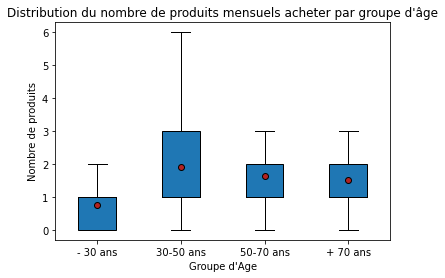

In [103]:
# Méthode n°1
# Etude de la frequence d'achat grace au nombre moyen de produits acheter par mois sur la durée total étudier

Freq_Groupe_Age = data
Freq_Groupe_Age['year'] = pd.DatetimeIndex(Freq_Groupe_Age['date']).year.astype(str)
Freq_Groupe_Age['month'] = pd.DatetimeIndex(Freq_Groupe_Age['date']).month.astype(str)
Freq_Groupe_Age['Mois-Année'] = Freq_Groupe_Age['month']+'-'+Freq_Groupe_Age['year']
Freq_Groupe_Age = Freq_Groupe_Age[['client_id','session_id','id_prod','Groupe', 'Mois-Année']]
Freq_Groupe_Age= Freq_Groupe_Age.groupby(['client_id','session_id','Mois-Année','Groupe']).count()
Freq_Groupe_Age = Freq_Groupe_Age.groupby(['client_id','Groupe','Mois-Année']).count().reset_index()
Freq_Groupe_Age = round(Freq_Groupe_Age.groupby(['client_id','Groupe']).sum()/24).reset_index()

# Ordonner les groupes par ordre croissant
order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
Freq_Groupe_Age = Freq_Groupe_Age.reindex(Freq_Groupe_Age['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)

X = "Groupe" # qualitative
Y = "id_prod" # quantitative
modalites = Freq_Groupe_Age[X].unique()
groupes = []
for m in modalites:
    groupes.append(Freq_Groupe_Age[Freq_Groupe_Age[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution du nombre de produits mensuels acheter par groupe d'âge")
plt.ylabel("Nombre de produits")
plt.xlabel("Groupe d'Age")
plt.show()

In [104]:
# Le lien entre la tranche d'âge des clients et la fréquence des achats - Analyse QUALITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='id_prod', between='Groupe', data=Freq_Groupe_Age)

,Source,ddof1,ddof2,F,p-unc,np2
0,Groupe,3,2841.832863,687.047721,0.0,0.110444


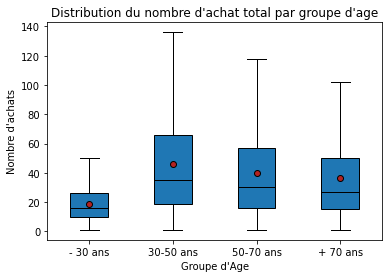

In [105]:
# Méthode n°2
# Etude de la frequence d'achat grace au nombre d'achat sur la durée total étudier

Freq_Achat_Groupe_Age = data.groupby(['client_id','Groupe']).nunique()
Freq_Achat_Groupe_Age = Freq_Achat_Groupe_Age[['session_id']].reset_index()
Freq_Achat_Groupe_Age = Freq_Achat_Groupe_Age.rename(columns={'session_id':'Nb_Achat'})
# On enlève les outliers
Freq_Achat_Groupe_Age = Freq_Achat_Groupe_Age[Freq_Achat_Groupe_Age['Nb_Achat'] < 2000]

# Ordonner les groupes par ordre croissant
order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
Freq_Achat_Groupe_Age = Freq_Achat_Groupe_Age.reindex(Freq_Achat_Groupe_Age['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)

X = "Groupe" # qualitative
Y = "Nb_Achat" # quantitative
modalites = Freq_Achat_Groupe_Age[X].unique()
groupes = []
for m in modalites:
    groupes.append(Freq_Achat_Groupe_Age[Freq_Achat_Groupe_Age[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution du nombre d'achat total par groupe d'age")
plt.ylabel("Nombre d'achats")
plt.xlabel("Groupe d'Age")
plt.show()

In [106]:
# Le lien entre la tranche d'âge des clients et la fréquence des achats - Analyse QUALITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='Nb_Achat', between='Groupe', data=Freq_Achat_Groupe_Age)

,Source,ddof1,ddof2,F,p-unc,np2
0,Groupe,3,2767.383866,825.990214,0.0,0.114476


**Synthède de la corrélation entre le groupe d'age et la fréquence d'achat**

On réalise les 2 même methodes que précedement !
<br/><br/>
*Méthode n°1 : Nombre de produits moyen acheté par mois*
<br/><br/>
On vois différentes variation et différentes moyenne en fonction du groupe d'age, ce qui nous laisse penser à une corrélation entre les 2 variables !
<br/><br/>
Nous sommes face à 1 variable quantitative et 1 variable qualitative !
<br/>
Le test Welch's ANOVA nous donne un rapport de corrélation proche de 0 mais une p-value infèrieur à 0,05.
<br/>
Donc nous avons bien une corrélation entre ces 2 variables !
<br/><br/>
*Méthode n°2 : Nombre d'achat total*
<br/><br/>
On vois différentes variation et différentes moyenne en fonction du groupe d'age, ce qui nous laisse penser à une corrélation entre les 2 variables !
<br/><br/>
Nous sommes face à 1 variable quantitative et 1 variable qualitative !
<br/>
Le test Welch's ANOVA nous donne un rapport de corrélation proche de 0 mais une p-value infèrieur à 0,05.
<br/>
Donc nous avons bien une corrélation entre ces 2 variables !

### *Corrélation entre l'age des clients et la taille du panier moyen*

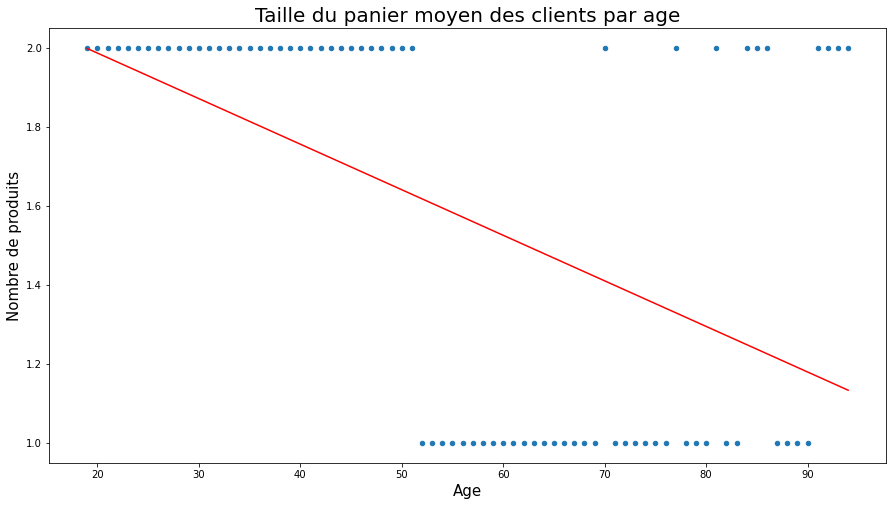

In [107]:
Age_Taille_Panier_Moy = data.groupby(['age', 'session_id']).count()
Age_Taille_Panier_Moy = round(Age_Taille_Panier_Moy.groupby('age').mean())
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy.rename(columns = {'id_prod':'nb_prod'})
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy[['nb_prod']]
Age_Taille_Panier_Moy = Age_Taille_Panier_Moy.reset_index()

slope, intercept, r_value, p_value, std_err = stats.linregress(Age_Taille_Panier_Moy['age'], Age_Taille_Panier_Moy['nb_prod'])
def predict(x):
   return slope * x + intercept

Age_Taille_Panier_Moy.plot.scatter(x= 'age', y= 'nb_prod', figsize=(15, 8))
plt.title("Taille du panier moyen des clients par age", size=20)
plt.ylabel("Nombre de produits", size=15)
plt.xlabel("Age", size=15)
fitLine = predict(Age_Taille_Panier_Moy['age'])
plt.plot(Age_Taille_Panier_Moy['age'], fitLine, c='r')
plt.show()

- L'analyse de régression linéaire montre une association négative entre les deux variables

In [108]:
# Le lien entre l'âge des clients et la taille du panier moyen - Analyse QUANTITATIF / QUANTITATIF
# Calcul du coefficient de Pearson

corr, p = pearsonr(Age_Taille_Panier_Moy['age'], Age_Taille_Panier_Moy['nb_prod'])
print('Pearsons correlation: %.3f' % corr)
print("Nous voyons ici qu'il y'a une importante corrélation !")
print("p-value : ",p)

Pearsons correlation: -0.510
Nous voyons ici qu'il y'a une importante corrélation !
p-value :  2.5195923513403555e-06


**Synthède de la corrélation entre l'age et la taille moyen du panier**

Sur le graphique on peut voir une différence entre les ages, ce qui nous laisse penser à une corrélation.
<br/><br/>
Nous sommes face à 2 variables quantitative !
<br/>
Grace aux resultats du test de Pearson nous obtenons un coéfficient de corrélation proche de -1, donc nous avons une corrélation.
<br/>
De plus nous avons une p-value infèrieur à 0.05 qui vient confirmé cette corrélation !

### *Corrélation entre l'age des clients et le montant du panier moyen*

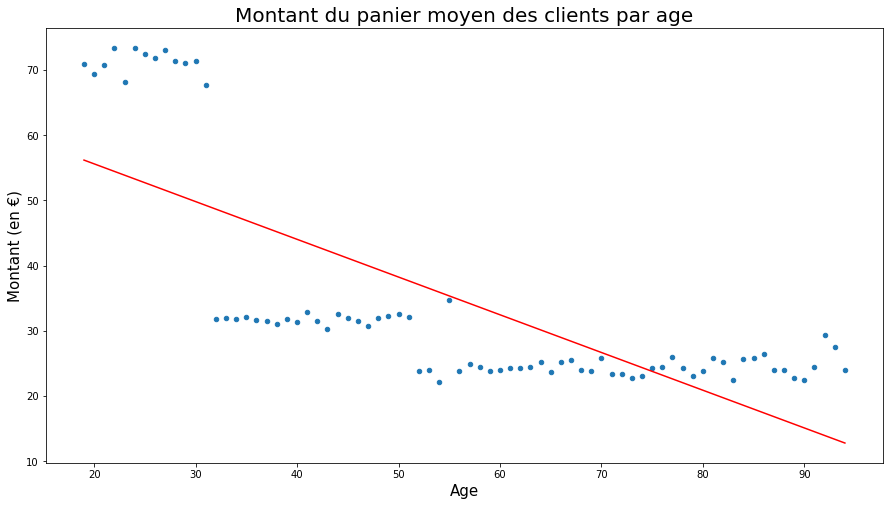

In [109]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Age_Panier_Moy['age'], Age_Panier_Moy['Prix (en €)'])
def predict(x):
   return slope * x + intercept


Age_Panier_Moy.plot.scatter(y= 'Prix (en €)',x= 'age', figsize=(15, 8))
plt.title("Montant du panier moyen des clients par age", size=20)
plt.ylabel("Montant (en €)", size=15)
plt.xlabel("Age", size=15)
fitLine = predict(Age_Panier_Moy['age'])
plt.plot(Age_Panier_Moy['age'], fitLine, c='r')
plt.show()

- L'analyse de régression linéaire montre une association négative entre les deux variables

In [110]:
# Le lien entre l'âge des clients et le montant du panier moyen - Analyse QUANTITATIF / QUANTITATIF
# Calcul du coefficient de Pearson

corr, p = pearsonr(Age_Panier_Moy['age'], Age_Panier_Moy['Prix (en €)'])
print('Pearsons correlation: %.3f' % corr)
print("Nous voyons ici qu'il y'a une importante corrélation !")
print("p-value : ",p)

Pearsons correlation: -0.746
Nous voyons ici qu'il y'a une importante corrélation !
p-value :  1.0325251279342246e-14


**Synthède de la corrélation entre l'age et le montant moyen du panier**

Sur le graphique on peut voir une différence entre les ages, ce qui nous laisse penser à une corrélation.
<br/><br/>
Nous sommes face à 2 variables quantitative !
<br/>
Grace aux resultats du test de Pearson nous obtenons un coéfficient de corrélation proche de -1, donc nous avons une corrélation.
<br/>
De plus nous avons une p-value infèrieur à 0.05 qui vient confirmé cette corrélation !

### *Corrélation entre la tranche d'age des clients et la taille moyen du panier*

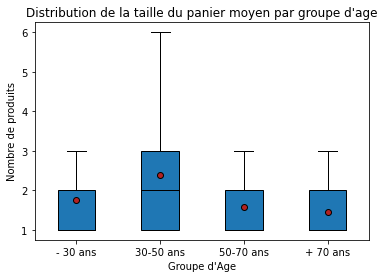

In [111]:
nbprod = data.groupby(['Groupe', 'session_id']).count()
nbprod = nbprod[['id_prod']].reset_index()


# Ordonner les groupes par ordre croissant
order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
nbprod = nbprod.reindex(nbprod['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)

X = "Groupe" # qualitative
Y = "id_prod"# quantitative

modalites = nbprod[X].unique()
groupes = []
for m in modalites:
    groupes.append(nbprod[nbprod[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution de la taille du panier moyen par groupe d'age")
plt.ylabel("Nombre de produits")
plt.xlabel("Groupe d'Age")
plt.show()

In [112]:
# Le lien entre la tranche d'âge des clients et la taille du panier moyen - Analyse QUANTITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='id_prod', between='Groupe', data=nbprod)

,Source,ddof1,ddof2,F,p-unc,np2
0,Groupe,3,87284.83455,11886.885277,0.0,0.096651


**Synthède de la corrélation entre le groupe d'age et la taille moyen du panier**

Sur le graphique on s'appercois qu'il y a 3 groupe dont la variation est trés similaire, cependant toutes les moyennes sont différentes.
<br/>
On pourrais donc s'attendre à une légère corrélation !
<br/><br/>
Nous sommes face à 1 variable quantitative et 1 variable qualitative !
<br/>
Le test Welch's ANOVA nous confirme cette légère corrélation grace à un p-value infèrieur à 0.05, malgré le rapport de corrélation proche de 0.

### *Corrélation entre la tranche d'age des clients et le montant moyen du panier*

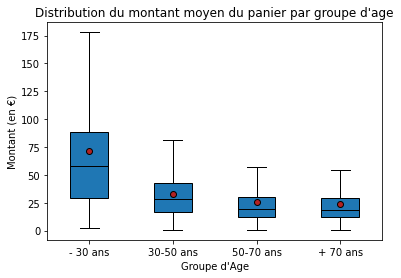

In [113]:
Panier_Moyen_Client_Groupe = data.groupby(['Groupe','session_id']).sum().reset_index()
Panier_Moyen_Client_Groupe = Panier_Moyen_Client_Groupe[['Groupe','session_id','price']]

# Ordonner les groupes par ordre croissant
order = ['- 30 ans', '30-50 ans', '50-70 ans', '+ 70 ans']
Panier_Moyen_Client_Groupe = Panier_Moyen_Client_Groupe.reindex(Panier_Moyen_Client_Groupe['Groupe'].map(dict(zip(order, range(len(order))))).sort_values().index)

X = "Groupe" # qualitative
Y = "price" # quantitative
modalites = Panier_Moyen_Client_Groupe[X].unique()
groupes = []
for m in modalites:
    groupes.append(Panier_Moyen_Client_Groupe[Panier_Moyen_Client_Groupe[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution du montant moyen du panier par groupe d'age")
plt.ylabel("Montant (en €)")
plt.xlabel("Groupe d'Age")
plt.show()

In [114]:
# Le lien entre la tranche d'âge des clients et le montant du panier moyen - Analyse QUALITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='price', between='Groupe', data=Panier_Moyen_Client_Groupe)

,Source,ddof1,ddof2,F,p-unc,np2
0,Groupe,3,82237.141988,9543.128242,0.0,0.181827


**Synthède de la corrélation entre le groupe d'age et le montant moyen du panier**

On appercoit directement des différences significative sur les 3 groupes, avec une moyenne et une variation différente.
<br/>
Donc nous pouvons penser qu'il y'a une forte corrélation entre les 2 variables !
<br/><br/>
Nous sommes face à 1 variable quantitative et 1 variable qualitative !
<br/>
Le test Welch's ANOVA nous confirme cette corrélation grace à un p-value infèrieur à 0.05, malgré le rapport de corrélation proche de 0.
<br/>
Alors nous n'avons pas une forte corrélation !

### *Corrélation entre l'age des clients et les categories de livres achetés*

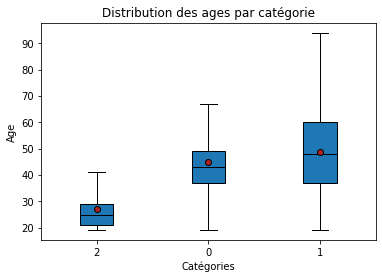

In [115]:
X = "categ" # qualitative
Y = "age" # quantitative
modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution des ages par catégorie")
plt.ylabel("Age")
plt.xlabel("Catégories")
plt.show()

In [116]:
# Le lien entre la tranche d'âge des clients et le montant du panier moyen - Analyse QUALITATIF / QUANTITATIF
# Test Welch's ANOVA (paramétrique)

pg.welch_anova(dv='age', between='categ', data=data)

,Source,ddof1,ddof2,F,p-unc,np2
0,categ,2,92416.956173,59308.353074,0.0,0.113275


**Synthède de la corrélation entre l'age et les catégories de livres achetés**

En observant le premier graphique on s'appercoit que chaque catégorie a sa tendance en fonction de l'age, et donc on en conclue qu'il y aurait potentielement une corrélation entre les 2 variables.
<br/><br/>
Nous somme face à 2 variable quantitative !
<br/>
Aprés avoir effectuer le teste de Pearson pour le 3 catégorie de livres, on obtient les mêmes résultats.
<br/>
Les coéfficients de corrélation sont asser proche de -1 et on a une p-value infèrieur à 0,05.
<br/>
Ce qui nous confirme la corrélation entre les 2 variables !

### *Corrélation entre le groupe d'age des clients et les categories de livres achetés*

In [117]:
# Le lien entre le groupe d'age des clients et les categories de livres achetés - Analyse QUALITATIF / QUALITATIF

X = "categ"
Y = "Groupe"

groupe_categ = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
groupe_categ

groupe_categ

Groupe,+ 70 ans,- 30 ans,30-50 ans,50-70 ans,Total
categ,,,,,
0,17008,14414,276973,79098,387493
1,21790,24119,88887,77552,212348
2,349,25760,5454,1285,32848
Total,39147,64293,371314,157935,632689


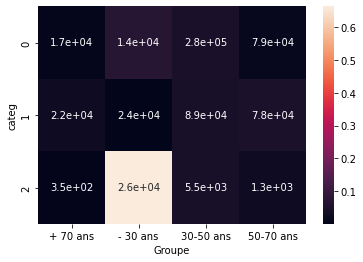

In [118]:
tx = groupe_categ.loc[:,["Total"]]
ty = groupe_categ.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = groupe_categ.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [119]:
# Le lien entre  le groupe d'age des clients et les categories de livres achetés - Analyse QUALITATIF / QUALITATIF

Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(groupe_categ)
print(Khi2_obs)
test_p_values(p_value)

227225.01673936172
On rejète H0, car p-value < 5%
Donc les 2 variables sont corréler !
p-value : 0.0


**Synthède de la corrélation entre l'age et les catégories de livres achetés**

Dans un premier temps en regardant le tableau de contingence on s'appercois qu'il y a des différence en fonction du groupe d'age.
<br/>
Ensuite en regardant le graphique on confirme cette différence, qui nous laisse penser à une corrélation.
<br/><br/>
Nous sommes face à 2 variable qualitative !
<br/>
Le teste de Chi-2 nous confirme une corrélation des variables, grace à une p-value infèrieur à 0,05 !